In [1]:
#data analysis for loan prediction

In [2]:
#importing all the required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [4]:
#importing the dataset

In [5]:
df=pd.read_csv("./train.csv")

In [6]:
#analyzing the train dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#we see many NaNs are present in the dataset

In [9]:
#cleaning the dataset

In [10]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              511 non-null object
Gender               511 non-null object
Married              511 non-null object
Dependents           511 non-null object
Education            511 non-null object
Self_Employed        511 non-null object
ApplicantIncome      511 non-null int64
CoapplicantIncome    511 non-null float64
LoanAmount           511 non-null float64
Loan_Amount_Term     511 non-null float64
Credit_History       511 non-null float64
Property_Area        511 non-null object
Loan_Status          511 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 55.9+ KB


In [13]:
#applicants on the basis of marital status

In [14]:
print("Percentage of people depending upon weather or not they are married:")
df.Married.value_counts(normalize=True)*100

Percentage of people depending upon weather or not they are married:


Yes    64.774951
No     35.225049
Name: Married, dtype: float64

In [15]:
#there are more married people applying for loan

Outer ring showing percentage of gender and inner on the basis of gender and marital status


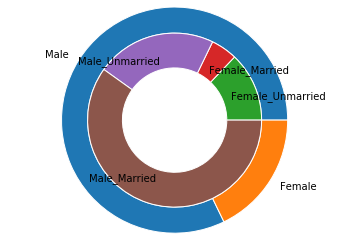

Percent of people of different gender applying for loan:
Male      82.191781
Female    17.808219
Name: Gender, dtype: float64
Percentage of people of different gender and marital status applying for loan:
Male_Married        59.882583
Male_Unmarried      22.309198
Female_Unmarried    12.915851
Female_Married       4.892368
Name: Identity, dtype: float64


In [16]:
#different groups of people applying for loan
gender=df['Gender'].value_counts(normalize=True) * 100

df["Identity"]=0
df.loc[(df["Gender"]=='Male')&(df["Married"]=='Yes'),"Identity"]="Male_Married"
df.loc[(df["Gender"]=='Male')&(df["Married"]=='No'),"Identity"]="Male_Unmarried"
df.loc[(df["Gender"]=='Female')&(df["Married"]=='Yes'),"Identity"]="Female_Married"
df.loc[(df["Gender"]=='Female')&(df["Married"]=='No'),"Identity"]="Female_Unmarried"
identity=df['Identity'].value_counts(normalize=True) * 100

print("Outer ring showing percentage of gender and inner on the basis of gender and marital status")
subgroup_labels=["Female_Unmarried","Female_Married","Male_Unmarried","Male_Married"]
group_size=df["Gender"].value_counts()
group_labels=["Male","Female"]
subgroup_size= df.groupby(["Gender","Married"])["Gender"].count()
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3,labels=group_labels)
plt.setp( mypie, width=0.3, edgecolor='white')
#Second Ring (inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labeldistance=0.7,labels=subgroup_labels)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
# show it
plt.show()
print("Percent of people of different gender applying for loan:")
print(gender)
print("Percentage of people of different gender and marital status applying for loan:")
print(identity)

In [17]:
#there are more male applicants than female applicants
#among male married people apply more whereas among female unmarried applicants are more

In [18]:
#applications on the basis of income

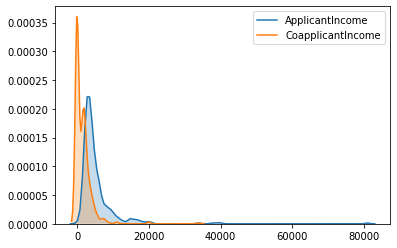

In [19]:
data = pd.DataFrame(df, columns=["ApplicantIncome", "CoapplicantIncome"])
for col in data:
    sns.kdeplot(data[col], shade=True)

In [20]:
#in many of the applications the coapplicant isn't an earning member

In [21]:
#applications on the basis of loan amount

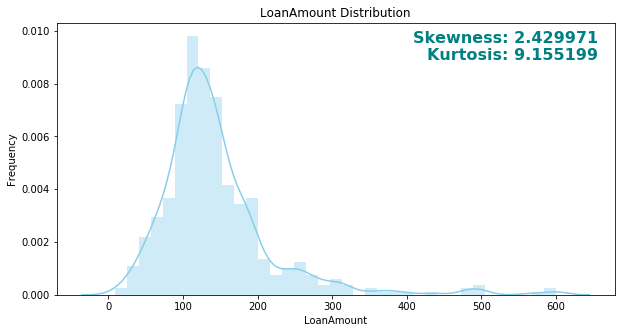

In [22]:
#Sale Price distribution
plt.figure(figsize=(10,5))
ax=sns.distplot(df.LoanAmount, hist=True , color='skyblue')
ax.text(x=0.97, y=0.97,transform=ax.transAxes, s="Skewness: %f" % df.LoanAmount.skew(),\
        fontweight='demibold', fontsize=16, verticalalignment='top', horizontalalignment='right',\
         color='teal')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df.LoanAmount.kurt(),\
        fontweight='demibold', fontsize=16, verticalalignment='top', horizontalalignment='right',\
       color='teal')
plt.ylabel('Frequency')
plt.title('LoanAmount Distribution')
plt.show()

In [23]:
#most of the applicants have applied for loan of loan amount around 100
#outliers can be seen
#also the distribution is highly skewed

In [24]:
#applications on the basis of employment

In [25]:
print("Percentage of people depending upon weather or not they are self employed:")
df.Self_Employed.value_counts(normalize=True)*100

Percentage of people depending upon weather or not they are self employed:


No     86.30137
Yes    13.69863
Name: Self_Employed, dtype: float64

In [26]:
#people who are self employed are the people who have their own business
#this means they hardly need home loan
#and from the above we see only around 15% of self employed people apply for loan

In [27]:
#outliers in the income

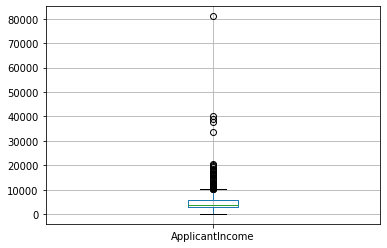

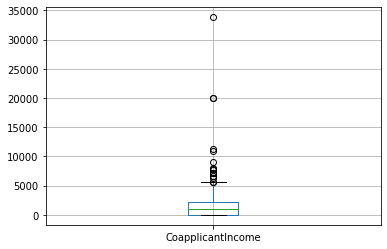

In [28]:
df.boxplot(column='ApplicantIncome')
plt.show()
df.boxplot(column='CoapplicantIncome')
plt.show()

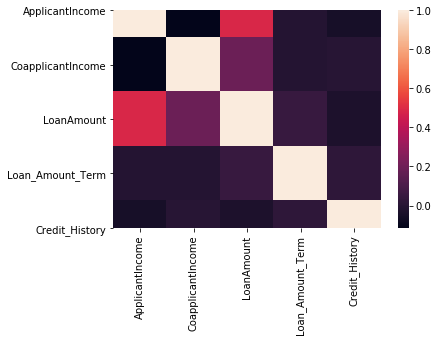

In [29]:
#correlation of all the factors
corr=df.corr()
sns.heatmap(corr)

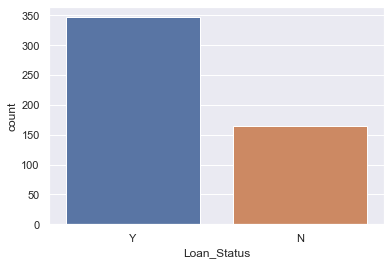

In [30]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Loan_Status", data=df)

In [31]:
#more than 65 percent of the loan has been accepted

In [32]:
#probability of getting loan on the basis of sex and gender

In [33]:
pd.crosstab(df['Loan_Status'],df['Identity']).apply(lambda r: r/r.sum(), axis=0)

Identity,Female_Married,Female_Unmarried,Male_Married,Male_Unmarried
Loan_Status,,,,
N,0.32,0.393939,0.284314,0.377193
Y,0.68,0.606061,0.715686,0.622807


In [34]:
#probability of getting loan:married_male>married_female>unmarried_male>unmarried_female

In [35]:
#influence of credit history in getting loan

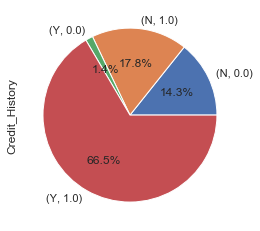

In [36]:
group = df.groupby(['Loan_Status','Credit_History'])['Credit_History'].count()
group.plot(kind="pie",autopct='%1.1f%%')

In [37]:
#people who have a good credit history has higher chances of getting a loan

In [38]:
#role of education in getting loan 

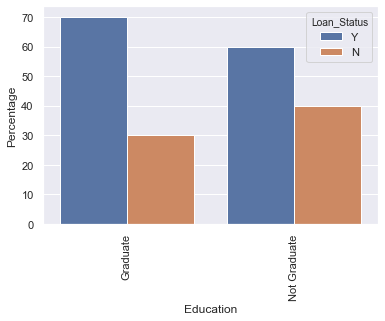

In [39]:
counts= (df.groupby(['Education'])["Loan_Status"]
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values("Education"))
p = sns.barplot(x="Education", y="Percentage", hue="Loan_Status", data=counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [40]:
#chances of getting loan to a graduated person is more than a non graduated person

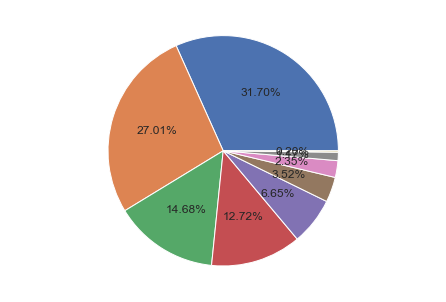

LowIncome..NotSelfEmployed..Loan=Yes     162
HighIncome..NotSelfEmployed..Loan=Yes    138
LowIncome..NotSelfEmployed..Loan=No       75
HighIncome..NotSelfEmployed..Loan=No      65
HighIncome..SelfEmployed..Loan=Yes        34
HighIncome..SelfEmployed..Loan=No         18
LowIncome..SelfEmployed..Loan=Yes         12
LowIncome..SelfEmployed..Loan=No           6
0                                          1
Name: a, dtype: int64


In [41]:
df["a"]=0
med=df.loc[:,"ApplicantIncome"].median()
df.loc[(df["ApplicantIncome"]>med)&(df["Self_Employed"]=='Yes')&(df["Loan_Status"]=='Y'),"a"]="HighIncome..SelfEmployed..Loan=Yes"
df.loc[(df["ApplicantIncome"]>med)&(df["Self_Employed"]=='Yes')&(df["Loan_Status"]=='N'),"a"]="HighIncome..SelfEmployed..Loan=No"
df.loc[(df["ApplicantIncome"]>med)&(df["Self_Employed"]=='No')&(df["Loan_Status"]=='Y'),"a"]="HighIncome..NotSelfEmployed..Loan=Yes"
df.loc[(df["ApplicantIncome"]>med)&(df["Self_Employed"]=='No')&(df["Loan_Status"]=='N'),"a"]="HighIncome..NotSelfEmployed..Loan=No"
df.loc[(df["ApplicantIncome"]<med)&(df["Self_Employed"]=='Yes')&(df["Loan_Status"]=='Y'),"a"]="LowIncome..SelfEmployed..Loan=Yes"
df.loc[(df["ApplicantIncome"]<med)&(df["Self_Employed"]=='Yes')&(df["Loan_Status"]=='N'),"a"]="LowIncome..SelfEmployed..Loan=No"
df.loc[(df["ApplicantIncome"]<med)&(df["Self_Employed"]=='No')&(df["Loan_Status"]=='Y'),"a"]="LowIncome..NotSelfEmployed..Loan=Yes"
df.loc[(df["ApplicantIncome"]<med)&(df["Self_Employed"]=='No')&(df["Loan_Status"]=='N'),"a"]="LowIncome..NotSelfEmployed..Loan=No"
count = df['a'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(count,autopct='%1.2f%%')
plt.show()
print(count)

In [42]:
#non self employed person have high

In [43]:
#correlation between Loan Amount and income

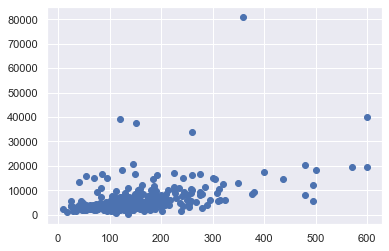

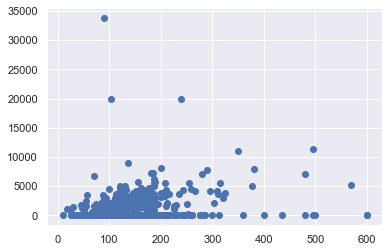

0.490152631937001
0.1922694933011653


In [44]:
plt.scatter(x=df["LoanAmount"], y=df["ApplicantIncome"])
plt.show()
plt.scatter(x=df["LoanAmount"], y=df["CoapplicantIncome"])
plt.show()
print(df["LoanAmount"].corr(df["ApplicantIncome"])) 
print(df["LoanAmount"].corr(df["CoapplicantIncome"])) 

In [45]:
#graphs show positive correlation which means people having higher income have higher loan amounts...
#this means the loan amount is amount of money the applicant is applying for

In [46]:
#on the basis of education location of property area

In [47]:
pd.crosstab(df["Property_Area"],df['Education']).apply(lambda r: r/r.sum(), axis=0)

Education,Graduate,Not Graduate
Property_Area,,
Rural,0.276808,0.345455
Semiurban,0.401496,0.327273
Urban,0.321696,0.327273


In [48]:
#Graduate person applies loan in semiurban and urban areas while non graduate in rural than others

In [49]:
#loan status on the basis of number of dependents

In [50]:
pd.crosstab(df['Loan_Status'],df['Dependents']).apply(lambda r: r/r.sum(), axis=0)

Dependents,0,1,2,3+
Loan_Status,,,,
N,0.326531,0.352941,0.25,0.363636
Y,0.673469,0.647059,0.75,0.636364


In [51]:
#acceptance and rejection is independent of the number of dependents

In [52]:
#removing the outliers

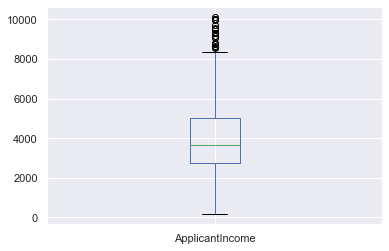

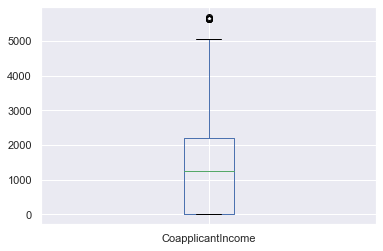

In [53]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['ApplicantIncome'] >= Q1 - 1.5 * IQR) & (df['ApplicantIncome'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]
df.boxplot(column='ApplicantIncome')
plt.show()
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['CoapplicantIncome'] >= Q1 - 1.5 * IQR) & (df['CoapplicantIncome'] <= Q3 + 1.5 *IQR)
df=df.loc[filter]
df.boxplot(column='CoapplicantIncome')
plt.show()